# Business predictions workshop

## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Income Classification Dataset

### Load datasets

In [159]:
data_set = pd.read_csv('data_set2.csv')
data_set.tail(20)

,is_match,company_type,page_handle,page_name,company_name,company_id,company_status_date,days_from_company_status_to_now,bigrams_intersection,times_prosecutor,...,number_of_different_months_with_reactions,total_posts_with_reactions,distinct_interacting_users,distinct_interacting_users_1qr_before_status,distinct_interacting_users_2qr_before_status,distinct_interacting_users_3qr_before_status,distinct_interacting_users_4qr_before_status,distinct_interacting_users_6months_before_status,distinct_interacting_users_12months_before_status,distinct_interacting_users_6months_after_status
2039,NaN,closed,135736653113184,ארוי חזקייה,"א.ר.וי. בע""מ",511332108,2016-06-28,0,9,0,...,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2040,NaN,closed,135820739955730,"ט.ר. מסחר ויבוא עצים בע""מ 03-6823665","מסחר עצים בע""מ",510035223,2016-06-28,0,26,0,...,19.0,20.0,138.0,95.0,1.0,7.0,5.0,96.0,106.0,0.0
2041,NaN,rasham,1047446358606898,נ.נ.פ נכסים והשקעות בע''מ,"פ.מ. נכסים בע""מ",514618016,2016-06-28,0,17,0,...,45.0,135.0,9.0,3.0,6.0,6.0,2.0,6.0,9.0,0.0
2042,NaN,closed,1047545795276373,מפעל אור הטבע - דודי שמש וחשמל,"אור הטבע דודי שמש וחשמל בע""מ",511139388,2016-06-28,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,closed,1047751211902461,"ע.ד.אשכנזי הובלות בע""מ",מ.ד. אשכנזי,510658644,2016-06-28,0,9,0,...,10.0,15.0,31.0,0.0,0.0,0.0,31.0,0.0,31.0,0.0
2044,NaN,rasham,1047751211902461,"ע.ד.אשכנזי הובלות בע""מ","ע.ד. אשכנזי הובלות בע""מ",513299982,2016-06-28,0,1,0,...,10.0,15.0,31.0,0.0,0.0,0.0,31.0,0.0,31.0,0.0
2045,1,rasham,104796642938110,אורטופדיה בירו,"אורטופדיה בירו בע""מ",511728164,2016-06-28,0,0,0,...,63.0,140.0,70.0,0.0,6.0,6.0,14.0,9.0,21.0,0.0
2046,NaN,rasham,104801066368781,"בן דוד קידוחים בע""מ","בן-דוד קידוחים בע""מ",515396273,2016-06-28,0,1,0,...,11.0,14.0,68.0,35.0,0.0,34.0,0.0,35.0,55.0,0.0
2047,NaN,closed,104820129589929,מומנטום פתרונות מימון,"ר.ס.ר. מימון (1982) בע""מ",510956550,2016-06-28,0,14,0,...,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048,NaN,forceliquidated,104832906337807,בית הבשר דבאח אכרם .כרמיאל,"בית הבשר כרמיאל בע""מ",511642027,1996-12-05,7145,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Set label column to 0/1

In [160]:
data_set['tag'] = data_set['company_type'].apply(lambda x: x == 'rasham')
data_set['tag'].head(10)

0     True
1     True
2     True
3     True
4    False
5     True
6    False
7    False
8     True
9    False
Name: tag, dtype: bool

### Change phone and email columns to binary

In [161]:
data_set['has_phone'] = data_set['phone'].apply(lambda x: type(x) == str)
data_set['has_email'] = data_set['email'].apply(lambda x: type(x) == str)
print data_set['has_phone'].head(10)
print data_set['has_email'].head(10)

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: has_phone, dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: has_email, dtype: bool


### Add binary columns to indicate 'likes' volume

In [162]:
data_set['has_more_than_1_likes'] = data_set['number_of_likes'].apply(lambda x: x > 1)
data_set['has_more_than_10_likes'] = data_set['number_of_likes'].apply(lambda x: x > 10)
data_set['has_more_than_100_likes'] = data_set['number_of_likes'].apply(lambda x: x > 100)

print data_set['has_more_than_1_likes'].head(10)
print data_set['has_more_than_10_likes'].head(10)
print data_set['has_more_than_100_likes'].head(10)

0     True
1    False
2    False
3    False
4     True
5     True
6     True
7     True
8    False
9    False
Name: has_more_than_1_likes, dtype: bool
0    False
1    False
2    False
3    False
4     True
5    False
6    False
7     True
8    False
9    False
Name: has_more_than_10_likes, dtype: bool
0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: has_more_than_100_likes, dtype: bool


### Drop irrelevant columns, fill missing values, change True/False to 1/0

In [164]:
tagged_data = data_set.drop(['is_match', 'page_name', 'page_handle', 'company_name', 'company_type', 'phone', 'email'], 1)
tagged_data.drop(['days_from_company_status_to_now', 'bigrams_intersection', 'companies_general_info_columns'], 1, inplace=True)

tagged_data.description_length.fillna(0, inplace=True)
tagged_data.total_posts.fillna(0, inplace=True)
tagged_data.total_declined.fillna(0, inplace=True)
tagged_data.about_words.fillna(0, inplace=True)
tagged_data.total_photos.fillna(0, inplace=True)
tagged_data.total_posts_with_reactions.fillna(0, inplace=True)
tagged_data.number_of_likes.fillna(0, inplace=True)
tagged_data.total_other_users_posts.fillna(0, inplace=True)
tagged_data.number_of_albums.fillna(0, inplace=True)
tagged_data.total_interested.fillna(0, inplace=True)
tagged_data.distinct_interacting_users.fillna(0, inplace=True)
tagged_data.distinct_interacting_users_1qr_before_status.fillna(0, inplace=True)
tagged_data.distinct_interacting_users_2qr_before_status.fillna(0, inplace=True)
tagged_data.distinct_interacting_users_3qr_before_status.fillna(0, inplace=True)
tagged_data.distinct_interacting_users_4qr_before_status.fillna(0, inplace=True)
tagged_data.distinct_interacting_users_6months_before_status.fillna(0, inplace=True)
tagged_data.distinct_interacting_users_12months_before_status.fillna(0, inplace=True)
tagged_data.distinct_interacting_users_6months_after_status.fillna(0, inplace=True)

tagged_data = tagged_data * 1 # get rid of True / False in favor of 1 / 0

tagged_data.columns.values

array(['company_id', 'company_status_date', 'times_prosecutor',
       'times_defendant', 'times_unknown_appearences', 'changed_picture',
       'has_website', 'has_top_20_website', 'has_phone', 'has_email',
       'number_of_likes', 'has_more_than_100_likes',
       'has_more_than_10_likes', 'has_more_than_1_likes', 'checkins',
       'were_here_count', 'talking_about_count', 'changed_cover',
       'has_location', 'has_country', 'has_state', 'has_country_state',
       'has_country_state_city', 'has_country_or_state_or_city',
       'is_unclaimed', 'is_published', 'is_verified',
       'is_permanently_closed', 'is_community_page', 'start_info',
       'has_start_info', 'has_text', 'description_length',
       'description_words', 'about_length', 'about_words',
       'products_length', 'products_words', 'general_info_length',
       'general_info_words', 'category', 'category_list',
       'number_of_records', 'number_of_pages', 'companies_events_columns',
       'first_event_time', 

In [165]:
tagged_data[['company_id', 'tag','has_website', 'has_email',  
             'has_location', 'has_country', #'has_state', 
             'number_of_likes', 'checkins', 'were_here_count', 'talking_about_count',
             'description_words', 'about_words', 'general_info_words', 'category',
             'total_events', 'total_attending', 'total_interested', 
             'total_photos','number_of_albums',
             'total_posts', 'total_posts_with_photos', 'total_posts_with_link',
             'total_posts_with_comments', 'total_posts_with_reactions',
             'total_other_users_posts','total_likes_to_other_users_posts']].head(20)

,company_id,tag,has_website,has_email,has_location,has_country,number_of_likes,checkins,were_here_count,talking_about_count,...,total_interested,total_photos,number_of_albums,total_posts,total_posts_with_photos,total_posts_with_link,total_posts_with_comments,total_posts_with_reactions,total_other_users_posts,total_likes_to_other_users_posts
0,513213751,1,0.0,0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1,0,0,1.0,1.0,0,3
1,513341958,1,0.0,0,1.0,0.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0,0,0,NaN,0.0,1,0
2,512748955,1,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0,0,0,NaN,0.0,1,0
3,513037002,1,1.0,0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,47.0,3.0,6,6,6,0.0,6.0,6,0
4,510109465,0,0.0,0,0.0,0.0,537.0,0.0,0.0,19.0,...,0.0,10.0,4.0,103,51,51,42.0,103.0,48,69
5,511431751,1,0.0,0,1.0,1.0,3.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0,0,0,NaN,0.0,1,0
6,510814577,0,0.0,0,1.0,1.0,3.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0,0,0,NaN,0.0,1,0
7,511716151,0,1.0,0,1.0,1.0,40.0,0.0,0.0,1.0,...,0.0,108.0,4.0,8,8,8,1.0,8.0,8,0
8,515406551,1,0.0,0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0,0,0,NaN,0.0,1,0
9,512067752,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,NaN,0.0,1,0


### Data Plotting - get a sense of major features and their affect on the business's success/failure

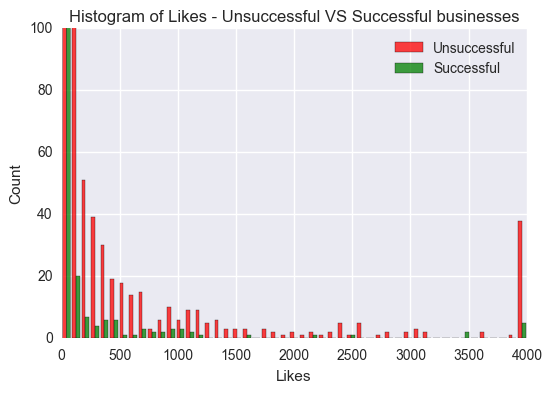

In [166]:
# sns.distplot(tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 0)].number_of_likes, bins = 50, kde = False)
# x = sns.distplot(tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 0)].number_of_likes, bins = 50, kde = False)
# y = sns.distplot(tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 1)].head(180).number_of_likes, bins = 50, kde = False)
# x = tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 0)].number_of_likes
# y = tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 1)].number_of_likes
clip_at = 4000

x = np.clip(tagged_data[tagged_data.tag == 0].number_of_likes, 0, clip_at)
y = np.clip(tagged_data[tagged_data.tag == 1].head(179).number_of_likes, 0, clip_at)
axes = plt.gca()
axes.set_ylim([0,100])
plt.hist([x, y], bins=np.linspace(0, clip_at, 50), color=['r', 'g'], alpha=0.75, label=['Unsuccessful', 'Successful'])
plt.title('Histogram of Likes - Unsuccessful VS Successful businesses')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

In [167]:
print len(tagged_data[tagged_data.tag == 0])
print len(tagged_data[tagged_data.tag == 1])

1459
600


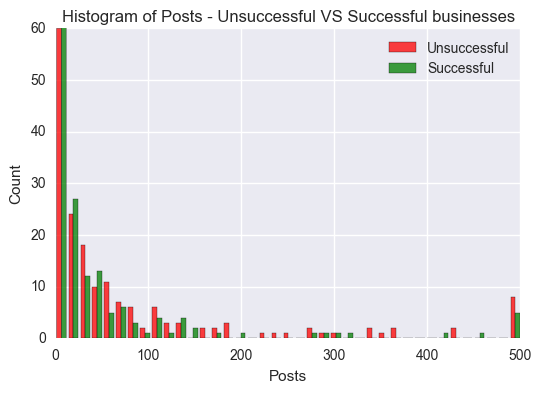

In [157]:
clip_at = 500

x = np.clip(tagged_data[tagged_data.tag == 0].total_posts, 0, clip_at)
y = np.clip(tagged_data[tagged_data.tag == 1].head(179).total_posts, 0, clip_at)
axes = plt.gca()
axes.set_ylim([0,60])
plt.hist([x, y], bins=np.linspace(0, clip_at+1, 40), color=['r', 'g'], alpha=0.75, label=['Unsuccessful', 'Successful'])
plt.title('Histogram of Posts - Unsuccessful VS Successful businesses')
plt.xlabel('Posts')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

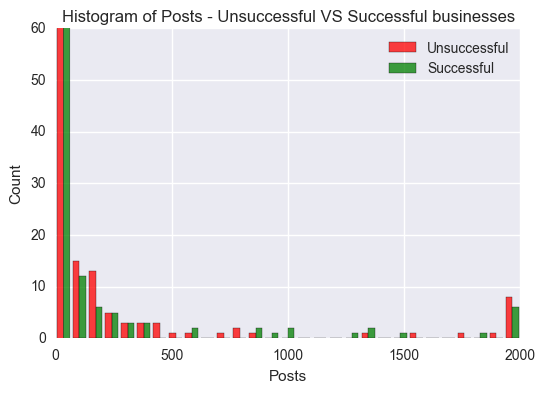

In [158]:
clip_at = 2000

x = np.clip(tagged_data[tagged_data.tag == 0].distinct_interacting_users, 0, clip_at)
y = np.clip(tagged_data[tagged_data.tag == 1].head(179).distinct_interacting_users, 0, clip_at)
axes = plt.gca()
axes.set_ylim([0,60])
plt.hist([x, y], bins=np.linspace(0, clip_at, 30), color=['r', 'g'], alpha=0.75, label=['Unsuccessful', 'Successful'])
plt.title('Histogram of interacting users - Unsuccessful VS Successful businesses')
plt.xlabel('Users')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


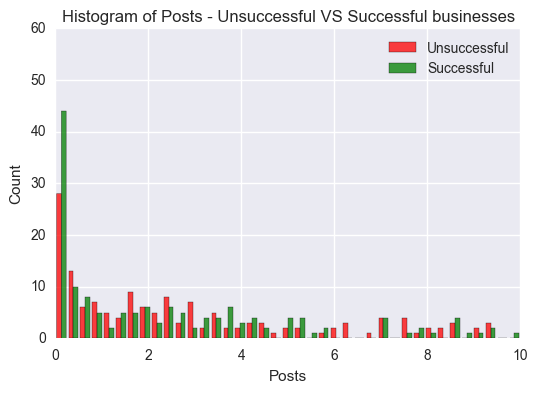

In [112]:
x = tagged_data[tagged_data.tag == 0].avg_likes_per_user_posts
y = tagged_data[tagged_data.tag == 1].head(179).avg_likes_per_user_posts
axes = plt.gca()
axes.set_ylim([0,60])
plt.hist([x, y], bins=np.linspace(0, 10, 40), color=['r', 'g'], alpha=0.75, label=['Unsuccessful', 'Successful'])
plt.title('Histogram of Posts - Unsuccessful VS Successful businesses')
plt.xlabel('Posts')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

126


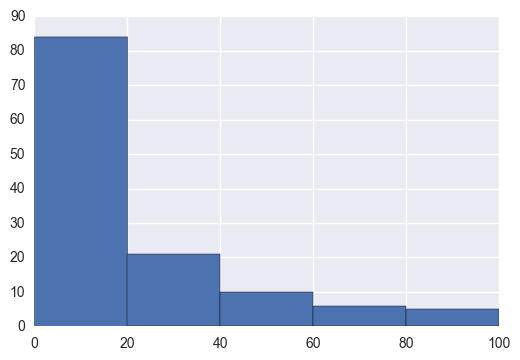

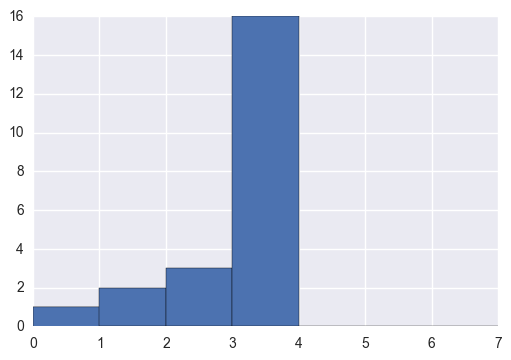

In [149]:
plt.hist(tagged_data[tagged_data.tag == 0].distinct_interacting_users, bins=[0,20,40,60,80,100])
print len(tagged_data[(tagged_data.tag == 0) & (tagged_data.distinct_interacting_users < 100)].distinct_interacting_users)
plt.show()
a = [0,1,1,2,2,2,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7]
b = np.clip(a, 0, 3)
plt.hist(np.clip(a, 0, 3), bins=[0,1,2,3,4,5,6,7])
plt.show()

In [47]:
# sns.distplot(tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 1)].head(180).number_of_likes, bins = 50, kde = False)
# plt.title('Histogram of Likes - Successful businesses')
# axes = plt.gca()
# axes.set_ylim([0,60])
# plt.xlabel('Likes')
# plt.ylabel('Count')
# plt.show()

In [50]:
# sns.distplot(tagged_data[(tagged_data.total_posts < 300) & 
#                          (tagged_data.tag == 0)].total_posts, bins = 50, kde = False)
# axes = plt.gca()
# axes.set_ylim([0,60])
# plt.title('Histogram of Posts - Successful businesses')
# plt.xlabel('Posts')
# plt.ylabel('Count')
# plt.show()

In [55]:
# sns.distplot(tagged_data[(tagged_data.total_posts < 300) & 
#                          (tagged_data.tag == 1)].head(190).total_posts, bins = 50, kde = False)
# axes = plt.gca()
# axes.set_ylim([0,60])
# plt.title('Histogram of Posts - Unsuccessful businesses')
# plt.xlabel('Posts')
# plt.ylabel('Count')
# plt.show()